# КОММЕНТАРИЙ РЕВЬЮВЕРА 2:

Приветствую тебя еще раз!) Спасибо за то, что доработал проект!

Мои комментарии будут также обозначены разными цветами, но с пометкой 2:
    
    «КОММЕНТАРИЙ РЕВЬЮВЕРА 2: ... »

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Юрий, ты классно доработал проект, думаю теперь я могу его принять) Желаю успехов в дальнейшем обучении!)

</div>

# КОММЕНТАРИЙ РЕВЬЮВЕРА
Привет, Юрий!)

Меня зовут Обидин Андрей, я проверял твой проект. Благодарю тебя за то, что вовремя всё сдал и хорошо поработал!) Мне понравился твой проект, однако есть несколько замечаний и рекомендаций, поработай с ними пожалуйста, после смогу принять проект!) Ты большой молодец, в конце есть чек-лист)

Далее по ходу работы ты сможешь встретить мои комментарии, они будут отмечены разными цветами:

<div class="alert alert-block alert-success">
Похвала и возможности развития
</div>
<div class="alert alert-block alert-warning">
Некритичные замечания, но стоит обратить внимание
</div>
<div class="alert alert-block alert-danger">
Грубая ошибка, необходимо исправить
</div>


Заранее прошу не удалять мои комментарии, это важно. Если у тебя возникнут вопросы, обозначь их, я с радостью тебе помогу!)

Как вариант, можешь обозначить их так:
<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
</div>

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

В начале проекта стоит давать чуть более развернутое описание, чтобы люди, которые будут его смотреть, могли полноценно со всем ознакомиться. Помимо краткой цели проекта рекомендую дать описание признаков данных и небольшое содержание. Можешь даже сделать <a href="https://sebastianraschka.com/Articles/2014_ipython_internal_links.html">кликабельные разделы</a>, чтобы ориентироваться в проекте было еще проще.
</div>

# Этап 1. Открываю файл с данными и изучаю общую информацию

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Количество игр в датасете
len(games['Name'].unique())

11560

In [6]:
#Проверим на наличие дубликатов
games.duplicated().sum()

0

In [7]:
#Проверим на наличие NaN
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

NaN значения присутствуют в 6 столбцах. Больше всего обращает на себя внимание столбец с годом релиза.

In [8]:
#Какие платформы представлены и их частота
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [9]:
games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.9       2
0.2       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

Так же обращаем внимание на tbd в пользовательской оценке.

In [10]:
len(games.query("User_Score == 'tbd'"))

2424

Его целых 2424 штуки.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Молодец, хороший осмотр датафрейма

</div>

# Этап 2. Подготавливаю данные

### Привожу название столбцов к нижнему регистру

In [11]:
games.columns = games.columns.str.lower()

In [12]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Работает.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Работает)

</div>

### Изменяю тип данных в столбцах и работаю с пропусками

In [13]:
#Начну со столбца с годом релиза.
len(games['year_of_release'])

16715

In [14]:
#Так как 269 пропусков относительно 16715 это не так, то просто заменю их на 0
#games['year_of_release']=games['year_of_release'].fillna(games['year_of_release'].median())

In [15]:
#Возвращает Series с пропусками в указанной колонке
def missing_data_in(col):

    return games[games[col].isnull()]

In [16]:
not_null_values = games[games['year_of_release'].notnull()]

In [17]:
#Функция для заполнения пропусков в year_of_release
def fill_year_of_release(row, **kwargs):
    col = 'year_of_release'
    rows = not_null_values[not_null_values['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [18]:
games['year_of_release'] = games.apply(fill_year_of_release, axis=1).astype('Int64')

In [19]:
len(missing_data_in('year_of_release'))

146

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Говоришь, что заполнишь нулем, но заполняешь медианой. На самом деле оба подхода недостаточно объективны.

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Как вариант пропуски можно и удалить, относительно размера датафрейма их мало. Либо можно заполнить следующим образом: у нас одна и та же игра может выходить на разных платформах, если ты посмотришь, то заметишь, что в большинстве случаев год релиза сильно не отличается, так что можно было заполнить пропуски в годе релиза по игре, просто взяв медианный год у той же игры, но с других платформ. Такими методами мы бы конечно не заполнили все пропуски, но восстановили бы большую их часть) Остатки тем более можно будет дропнуть.


</div>
<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА: заполнил пропуски функцией, которая заполняет пропущенные значения, беря значения из другой платформы. Оставшиеся 143, я так понял мы пропсто пропускаем.</b>
</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Можно остатки удалить

</div>

In [20]:
games['year_of_release'].isna().sum()

146

In [21]:
games['year_of_release'].value_counts()

2008    1433
2009    1426
2010    1264
2007    1208
2011    1167
2006    1016
2005     933
2002     828
2004     783
2003     747
2012     672
2015     581
2014     551
2013     535
2001     526
2016     475
1998     401
2000     353
1999     331
1997     301
1996     275
1995     212
1994     149
1993      63
1992      52
1991      50
1981      44
1982      37
1986      24
1989      21
1983      19
1985      17
1984      16
1987      16
1990      15
1988      14
1980      14
Name: year_of_release, dtype: int64

In [22]:
# tbd нам мешает и по сути своей является NaN значением.Оно означает to be determined или to be discused
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Можно было использовать `to_numeric(errors = 'coerce')`, так бы tbd заменился на nan, а тип сконвертировался в float

</div>

In [23]:
#Теперь можно заменить тип данных в столбцах с оценками. Пользовательская с плавающей точкой, оценка критиков - целое число.
games['critic_score'] = games['critic_score'].astype('Int64')
games['user_score'] = games['user_score'].astype('float64')

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Типы данных заменены. Возможной причиной, которая могла привести к пропускам могла быть неправильная выгрузка данных, либо недостаточное кол-во отзывов как в случае с user_score

### Суммарные продажи

In [25]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Молодец, что не стал заполнять оценки, это могло исказить анализ

</div>

# Этап 3. Проведение исследовательского анализ данных

### Сколько игр выпускалось в разные года

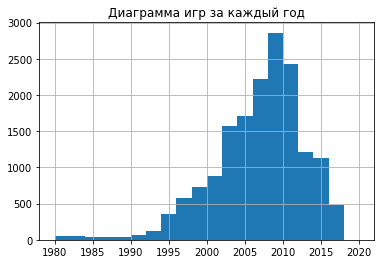

In [26]:
games['year_of_release'].hist(bins=20, range=(1980,2020))
plt.title('Диаграмма игр за каждый год')
plt.show()

Данные за все периоды не важны, т.к с 1980 по 1995 год видно, как индустрия игр не развивалась. Возможно это связано с тем, что компьютеры в то время не были способны запускать что-то интересное, кроме пинг понга. Нам интересны данные после 1995 года.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Симпатичное сочетание цветов) Я согласен с твоим выводом, видим еще что произошел сильный скачок на 2002 год, пик пришелся на 2008-2009

</div>

### Самые популярные платформы

In [27]:
# Глобальные продажи по платформам
def total_sales_per_platform_for(df):
    return (
        df
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )

In [28]:
# Столбчатая диаграмма глобальных продаж
def bar_plot(df):
    (
        df
            .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
            .set(xlabel='Платформа', ylabel='Глобальные продажи')
    )
    plt.show()

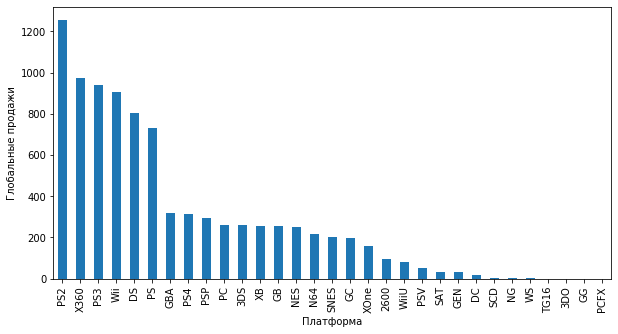

In [29]:
bar_plot(total_sales_per_platform_for(games))

Исходя из этой диаграммы можно выделить и работать с первыми 6 консолями, т.к после PS начинается сильный разрыв между остальными.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 


Завернул, так завернул)

Получилось круто, действительно видим, что лидеры у нас идут от Майкрософт \ Сони \ Нинтендо
</div>

In [30]:
top6 = total_sales_per_platform_for(games).head(6)
top6

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


In [31]:
def yearly_total_sales_by_platform(name, df):

    
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

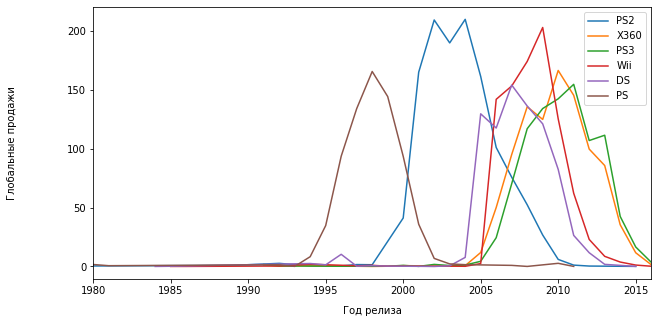

In [32]:
# Используя цикл for, строю график глобальных продаж по платформе по годам
for platform in list(top6.index):
    yearly_total_sales_by_platform(platform, games)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год релиза", labelpad=10)
    plt.ylabel("Глобальные продажи", labelpad=50)
    plt.legend()

Каждая платформа имеет срок жизни +- 10 лет. Это видно исходя из построенного нами графика.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Видим, что к 2016 году все ранние лидеры уже заканчивают свой цикл, действительно похоже на то, что срок жизни близок к 10 годам, но тк это по сути мастодонты рынка в остальных платформах срок поменьше

</div>

In [33]:
#Определим актуальный период через срез с 2013 по 2016
actual_years = (games['year_of_release'] > 2013) & (games['year_of_release'] <= 2016)
actual_games = games.loc[actual_years]

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Такой период слишком широкий, ранее мы поняли, что пик пришелся где-то на 2008-2009 год, тут мы видим, что действительно продажи в эти года наиболее высокие, далее идет спад. Думаю логичнее взять где-то с 2013-14, чтобы зацепить новый цикл индустрии

</div>
<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА: изменил срез на 2012-2016, чтобы взять наверняка :)</b>
</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Пишешь про 2012-16, а поставил 14-16, что лучше на самом деле)

</div>

### Какие платформы лидируют по продажам, растут или падают

In [34]:
total_sales = total_sales_per_platform_for(actual_games)

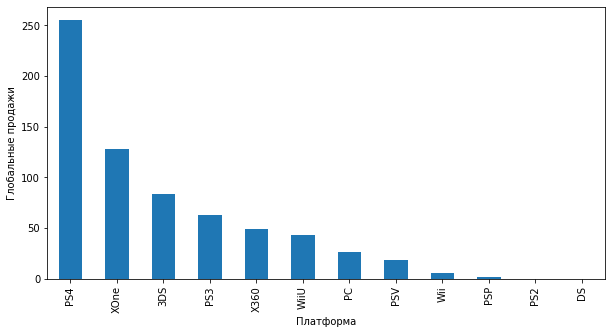

In [35]:
bar_plot(total_sales)

На графике видно, что лидирует PS4 и XBox One

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Выбились наконец то вперед!!

</div>

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


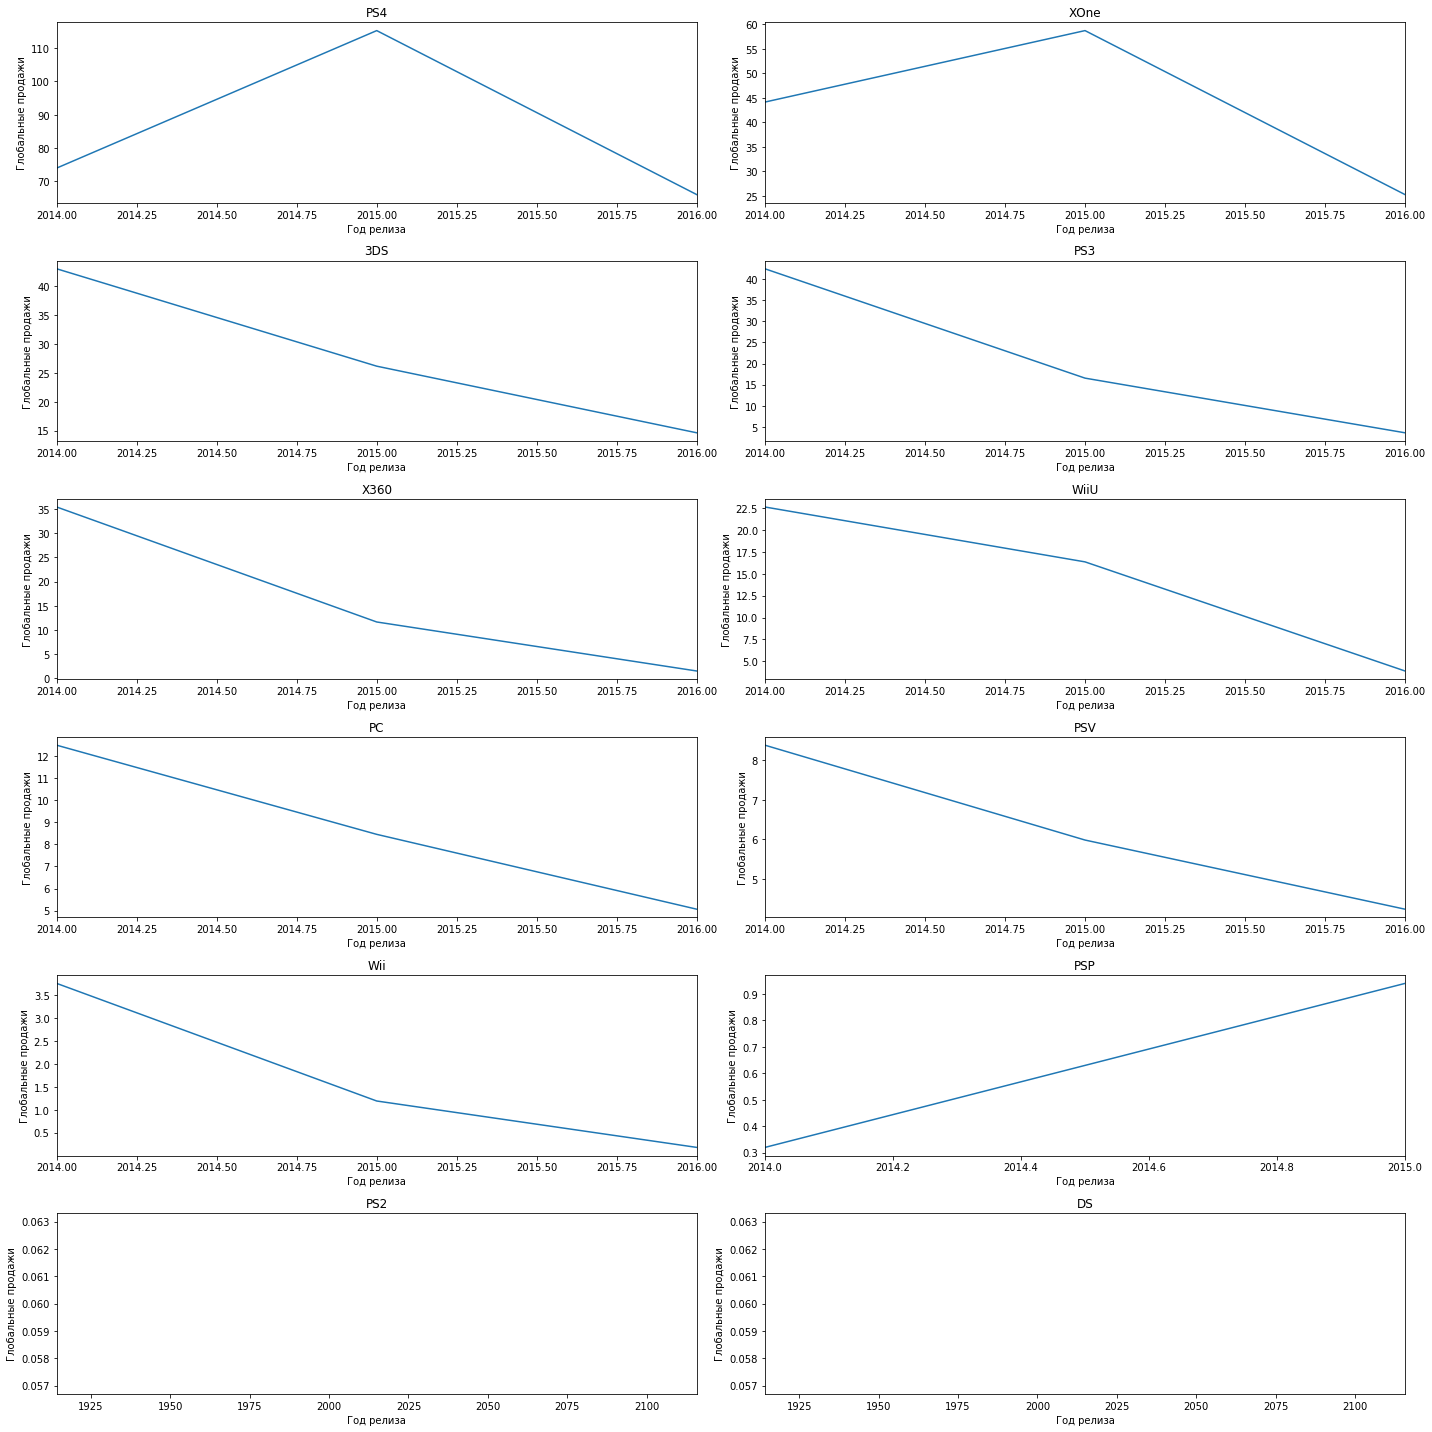

In [36]:
# список платформ за актуальный период
platforms = list(total_sales.index)

# график из 6 строк
rows = 6
cols = (len(platforms) // rows)
fig, ax = plt.subplots(rows, cols)

# построение графиков продаж по каждой платформе
num = 0
for row in range(rows):
    for col in range(cols):
        platform = platforms[num]
        (
            yearly_total_sales_by_platform(platform, actual_games)['total_sales']
                .plot(ax=ax[row, col], figsize=(20, 20), title=platform)
                .set(xlabel='Год релиза', ylabel='Глобальные продажи')
        )
        num += 1

plt.tight_layout()
plt.show()

Исходя из матрицы наших графиков, можно сделать вывод, что все старые консоли уходят в закат. Популярность всегда набирают некстген консоли PS4 и Xbox one. Именно по ним мы и будем рассматривать данные.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
   
Кажется гораздо нагляднее было бы отобразить все на одном графике, например:

</div>

In [37]:
# КОД РЕВЬЮВЕРА

import plotly.express as px

fig = px.bar(actual_games.pivot_table(index = ['year_of_release', 'platform'], values = 'total_sales', aggfunc = 'sum').reset_index(),
            x = 'year_of_release', y = 'total_sales', color = 'platform')
fig.show()

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
   
Видим, что с 2013-14 года ранее популярные платформы PS3 \ X360 начинают сбавлять обороты и на смену им приходит новая PS4 \ XOne, постепенно набирая темп к 2016 году. На момент 16 года видим, что рынок держит PS4 \ XOne \ 3DS, на последнюю я бы тоже сделал ставку на 2017


</div>

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам 

Среднее значение глобальных продаж игр для PS4: 85.11333333333336
Среднее значение глобальных продаж игр для XOne: 42.713333333333345


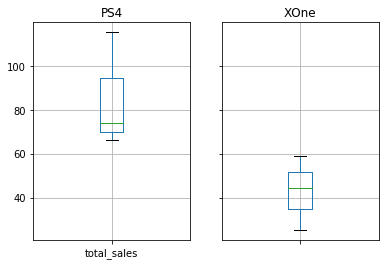

In [38]:
top_platforms = ['PS4', 'XOne']

fig, axs = plt.subplots(1, 2, sharey=True)

# построение графиков продаж по каждой платформе
for num, platform in enumerate(top_platforms):
    df = yearly_total_sales_by_platform(platform, actual_games)
    print(f"Среднее значение глобальных продаж игр для {platform}: {df['total_sales'].mean()}")
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

plt.tick_params(labelcolor='none', bottom='off')
plt.subplots_adjust(left=0.1)
plt.show()

В данном случае PS4 очень сильно лидирует над XBox One практически в два раза.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
   
Вероятно по Сони также выходит бОльшее число игр, именно этим обуславливаются высокие суммарные продажи. 
    
Давай просто посмотрим распределение продаж без группировки по годам:


</div>

In [39]:
# КОД РЕВЬЮВЕРА

fig = px.box(actual_games.query('platform in ("PS4", "XOne", "3DS") and total_sales < 6'), x = 'platform', y = 'total_sales')
fig.show()

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
   
Не смотря на то, что в среднем PS4 приносит ежегодно больше, мы видим, что если просто смотреть на средние продажи, то по XONe они выше, это означает, что PS4 штампует более дешевые игры в большем кол-ве, тогда как игра по  XOne дороже
    
Давай посмотрим кол-во игр:
    


</div>

In [40]:
# КОД РЕВЬЮВЕРА

fig = px.bar(actual_games.query('platform in ("PS4", "XOne", "3DS")').pivot_table(index = 'platform', values = 'name', aggfunc = 'count').reset_index(),
             x = 'platform', y = 'name', color = 'platform')
fig.show()

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Ну вот, как видим игр на PS4 больше, чем на XONe

</div>

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [176]:
ps4 = actual_games.query("platform == 'PS4'")
xone = actual_games.query("platform == 'XOne'")

In [177]:
features = ['user_score', 'critic_score', 'total_sales']
ps4[features].corr()

,user_score,critic_score,total_sales
user_score,1.00000,0.543850,-0.081460
critic_score,0.54385,1.000000,0.393285
total_sales,-0.08146,0.393285,1.000000


In [178]:
xone[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.432517,-0.099283
critic_score,0.432517,1.000000,0.408364
total_sales,-0.099283,0.408364,1.000000


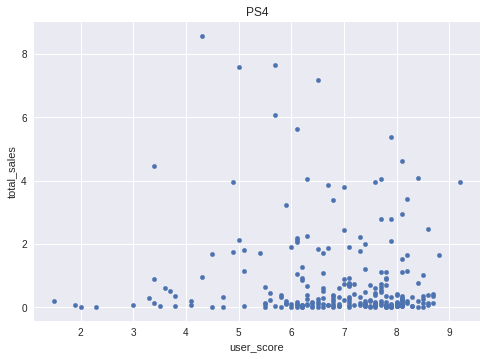

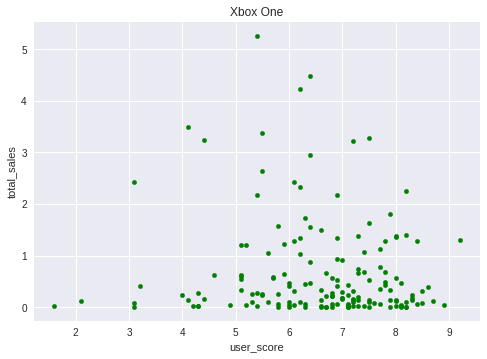

In [179]:
#Строим графики
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='user_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

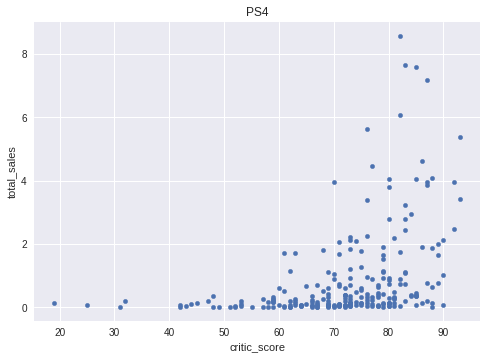

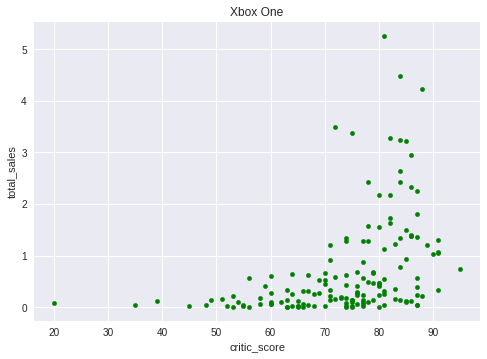

In [180]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='critic_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

In [181]:
games[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.580878,0.088179
critic_score,0.580878,1.000000,0.245507
total_sales,0.088179,0.245507,1.000000


Исходя из полученных результатов можно сделать вывод, что связи между оценками пользователей и продажами нет, а вот между критиками и продажи - есть, но слабая.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Cогласен, корреляция слабовата, но все же по оценкам критиков она выше



</div>

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Посмотри общую тенденцию, не ограничиваясь платформами. Можно просто построить табличку корреляции по актуальному датафрейму.

</div>
<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА: построил матрицу корреляции для features для всего датафрейма</b>
</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Видим, что тенденция сохраняется по всем данным

</div>

### Общее распределение игр по жанрам. 

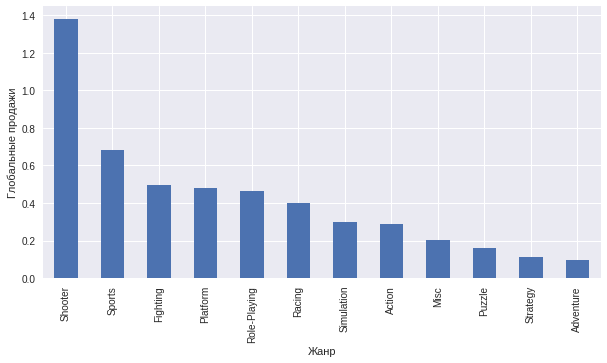

In [182]:
(actual_games
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

Самым продаваемым жанром является шутер. Из данной диаграммы, можно сделать вывод, что хуже всего продаются приключения и стратегии. 

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Посмотри топ еще по сумме и кол-ву игр, полагаю тут схожая ситуация, как ранее была по платформам и по шутерам стоимость игры дороже, тогда как то же кол-ву вероятно не такое высокое

</div>

# Этап 4. Составляю портрет пользователя каждого региона

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Давай пересмотрим портреты с более узким актуальным периодом, результаты станут более объективными

</div>

### NA

In [198]:
plt.style.use('seaborn')

In [199]:
region = 'na_sales'

In [200]:
def top5_in_region(column):
    return (
        actual_games
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(5)
    )

In [201]:
def sales_pie_by_region(df,nameofgraph):
    (
        df
            .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(10, 5), legend=False)
            .set(ylabel='Продажи')
            
    )
    plt.title(nameofgraph)
    plt.show()

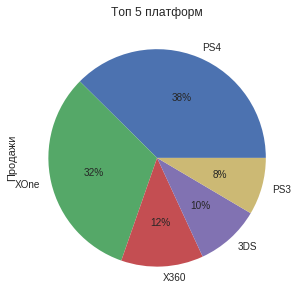

In [202]:
#Топ 5 платформ. Использую диаграмму pie для этого.
sales_pie_by_region(top5_in_region('platform'),'Топ 5 платформ')

Исходя из полученной круговой диаграммы, можно сделать вывод, что наибольшей популярностью в Северной Америке пользуется PS4. На втором месте идет XOne, что не удивительно, ведь Sony является на первом месте в мире.

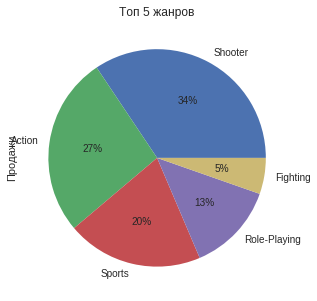

In [203]:
#Топ 5 жанров
sales_pie_by_region(top5_in_region('genre'),'Топ 5 жанров')


На первом месте по жанрам находиться Шутер. Action находится на втором месте.

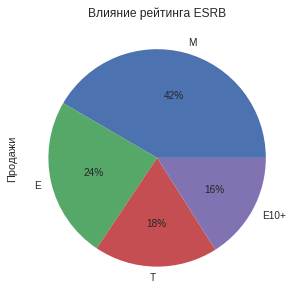

In [204]:
#Как влияет ESRB рейтинг на продажи
sales_pie_by_region(top5_in_region('rating'),'Влияние рейтинга ESRB')

Игры с рейтингом M(Mature) продаются больше, чем игры с рейтингом E(Everyone).

### Europe

In [205]:
region = 'eu_sales'

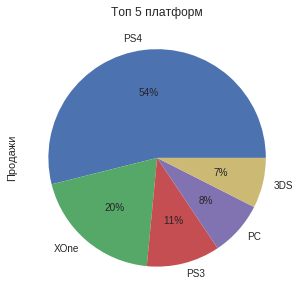

In [206]:
#Топ платформ
sales_pie_by_region(top5_in_region('platform'),'Топ 5 платформ')

В Европе больше половины всех продаж берет на себя PS4, а второе XOne.

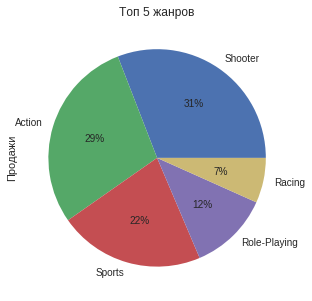

In [207]:
#топ жанров
sales_pie_by_region(top5_in_region('genre'),'Топ 5 жанров')

Из жанров на первом месте тот же Shooter, а на втором Action, как и в NA. На последнем месте игры жанра Racing.

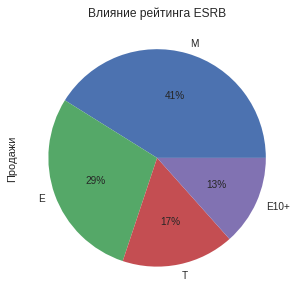

In [208]:
#Рейтинг ESRB
sales_pie_by_region(top5_in_region('rating'),'Влияние рейтинга ESRB')

Игры с рейтингом M лидируют. На втором месте игры с рейтингом E.

### Japan

In [209]:
region = 'jp_sales'

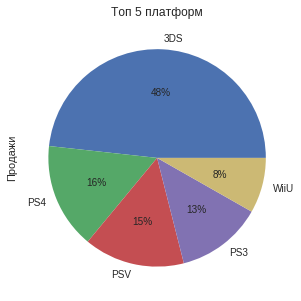

In [195]:
#Топ платформ
sales_pie_by_region(top5_in_region('platform'),'Топ 5 платформ')

В Японии картина по платформам кардинально отличается. На первом месте здесь находятся 3DS и PS4, а XBox не видно вообще.

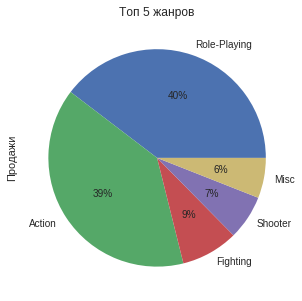

In [210]:
#Топ жанров
sales_pie_by_region(top5_in_region('genre'),'Топ 5 жанров')

По жанрам картина так же отличается, т.к здесь мы видим, что жанр Role-Playing с небольшим отрывом лидирует и превосходит по популярности жанр Action.

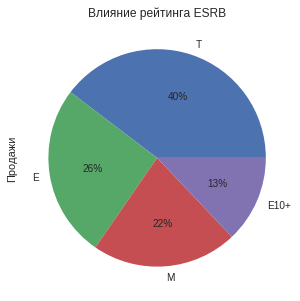

In [211]:
#Рейтинг ESRB
sales_pie_by_region(top5_in_region('rating'),'Влияние рейтинга ESRB')

В Японии игры с рейтингом T(Teen) находятся на первом месте по продажам. Игры с рейтингом E находятся на втором месте по продажам. Категория M, популярная в остальном мире, в Японии имеет только 22% продаж.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Наблюдается определенная схожесть Европы и Америки, но давай сократим период с 2014 года и посмотри на более актуальную информациб

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Видим, что теперь лидирующие позиции занимают более свежие платформы. Как и ранее портрет Европы и Америки очень похож, разве что первые в большей степени отдают предпочтение Сони, тогда как у вторых % Майкрософт повыше. Япония же совсем имеет другие вкусы.

</div>

# Этап 5. Проверяю гипотезы

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

В гипотезах также стоит работать с более актуальным периодом
    
</div>

### Проверим гиппотезу номер 1<BR>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза<br>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
Альтернативная гипотеза<br>
Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Из-за пропусков, стоит выбрать значение alpha равное 2.5%

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Думаю лучше использовать стандартный уровень значимости, но скорректировать актуальный период
    
</div>

In [212]:
alpha = .05

In [213]:
pc = actual_games.query("platform == 'PC'")

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False,  
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.13087616880173122
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Видим, что получили более высокое п-значение, что позволяет нам с большей уверенностью не отвергать Но и считать, что стат. значимых различий межу оценками по XOne PC нет

</div>

In [214]:
pc['user_score'].mean()

6.28595041322314

In [215]:
xone['user_score'].mean()

6.573125

Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" верна.

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
    
</div>
<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
* Двухсторонние гипотезы сформулированы верно
    
* Критерий проверки выбран правильно

* В ходе теста, мы получили высокое p-значение. Можно сделать вывод, что пользовательские оценки по платформам XOne PC конечно же имеют различия, но получить такие различия с вероятностью  4% можно случайно. Это слишком высокая вероятность случайности, чтобы отвергать гипотезу Но, учитывая что мы поставили порог 2,5%. Таким образом делаем вывод, что оценки по выбранным платформам схожи, а если различия и имеются, то они статистически незначимы.

</div>

### Проверим гипотезу номер 2

Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза<br>
Средние пользовательские рейтинги жанров Action и Sports одинаковые.<br>
Альтернативная гипотеза<br>
Средние пользовательские рейтинги жанров Action и Sports различаются.

In [218]:
alpha = .05

In [219]:
action = actual_games.query("genre == 'Action'")
sports = actual_games.query("genre == 'Sports'")

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7812828600813157e-18
Отвергаем нулевую гипотезу


Гипотеза "Средние пользовательские рейтинги жанров Action и Sports различаются" верна.

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Опять же, мы ничего не подтверждаем.

</div>
<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
   
* Двухсторонние гипотезы сформулированы верно
    
* Критерий проверки выбран правильно
    
* В ходе теста мы получили очень малое p-значение, что дает нам основание отвергнуть гипотезу Но о равенстве, делаем вывод, что средние пользовательские рейтинги по жанрам Action и Sport имеют статистически значимые различия. Иногда п-значение интерпретируют как «вероятность ошибочного отклонения Но», т.е. в данном случае ОШИБОЧНО отклонить гипотезу Но можно с очень маленькой вероятностью, таким образом у нас получается достаточно оснований чтобы ее отклонить и быть спокойными)

</div>

# Этап 6. Общий вывод.

Исходя из проделанной работы можно сделать выводы.
Мы исследовали жизнь платформ и поняли, что каждая платформа живет +- 10 лет. Во всем мире наиболее популярными платформами являются PS4 и Xbox One. В Японии картина сильно отличается. <br>
Так-же в Японии картина сильно отличается и по жанрам. Во всем мире популярными являются Action и Shooter, а в Японии Role-Playing.<br>
Большинство продаж во всем мире приходится на рейтинг Ь. <br>
После выдвижения гипотез, подтвердились:<br>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Средние пользовательские рейтинги жанров Action и Sports различаются.

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

В целом вывод хороший, но он чуть изменится, когда ты учтешь мои замечания
    
</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Полагаю ты имел в виду рейтинг М, он действительно наиболее популярен в Америке Европе и других странах, но по Японии он не в топе.

Опять же, гипотезы мы не подтверждаем, нельзя говорить, что мы что-то подтвердили.

</div>

### **Чек-лист по заданиям**

- [x]  Открыты все файлы
- [x]  Файлы изучены (выведены первые строки, метод info())
- [x]  Заменены названия столбцов
- [x]  Данные приведены к нужным типам
- [x]  Обработаны пропуски
- [x]  Выполнено задание: Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x]  Выполнено задание: Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?
- [x]  Выполнено задание: Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.
- [x]  Выполнено задание: Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.
- [x]  Выполнено задание: Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x]  Выполнено задание: Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
- [x]  Выполнено задание: Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах
- [x]  Выполнено задание: Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- [x]  Составлен портрет пользователя *NA,*
- [x]  Составлен портрет пользователя *EU*
- [x]  Составлен портрет пользователя  *JP*
- [x]  Проверена гипотеза: "Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;"
- [x]  Проверена гипотеза: "Средние пользовательские рейтинги жанров *Action* (англ. «действие») и *Sports* (англ. «виды спорта») разные."
- [x]  Есть пояснения к проверке гипотез: "как вы формулировали нулевую и альтернативную гипотезы"
- [x]  Есть пояснения к проверке гипотез: "какой критерий использовали для проверки гипотез и почему"
- [x]  В каждом этапе есть выводы
- [x]  Есть общий вывод

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Юрий, у тебя хороший проект, однако парочку моментов стоит подправить!)
    
</div>
<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА: Спасибо тебе за твои комментарии и советы,</b>
</div>


<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Пожалуйста)

</div>